This time series project contains the below topics

EDA with time series:
1. Pandas Data Reader - Financial Data
2. Date time index
3. Time Resampling
4. Time shifts
5. Mean rolling and expanding
6. Time series visualisation
7. One sample project on time series

In [8]:
#import all libraries and modules
import pandas_datareader as pdr
import pandas as pd
from   datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#code to list all columns
pd.set_option('display.max_columns', None)

In [1]:
import yfinance as yf

# Define the ticker symbol (e.g., TSLA for Tesla)
ticker_symbol = "TSLA"

# Create a Ticker object
ticker = yf.Ticker(ticker_symbol)

# Get historical data
historical_data = ticker.history(period="1mo")

# You can specify different periods, such as "1d" for one day, "1mo" for one month, "1y" for one year, and more.

# Print the historical data
print(historical_data)

                                 Open        High         Low       Close  \
Date                                                                        
2023-09-26 00:00:00-04:00  242.979996  249.550003  241.660004  244.119995   
2023-09-27 00:00:00-04:00  244.259995  245.330002  234.580002  240.500000   
2023-09-28 00:00:00-04:00  240.020004  247.550003  238.649994  246.380005   
2023-09-29 00:00:00-04:00  250.000000  254.770004  246.350006  250.220001   
2023-10-02 00:00:00-04:00  244.809998  254.279999  242.619995  251.600006   
2023-10-03 00:00:00-04:00  248.610001  250.020004  244.449997  246.529999   
2023-10-04 00:00:00-04:00  248.139999  261.859985  247.600006  261.160004   
2023-10-05 00:00:00-04:00  260.000000  263.600006  256.250000  260.049988   
2023-10-06 00:00:00-04:00  253.979996  261.649994  250.649994  260.529999   
2023-10-09 00:00:00-04:00  255.309998  261.359985  252.050003  259.670013   
2023-10-10 00:00:00-04:00  257.750000  268.940002  257.649994  263.619995   

In [4]:
# Get historical data
tesla = ticker.history(period="1y")

In [5]:
tesla.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-10-26 00:00:00-04:00,219.399994,230.600006,218.199997,224.639999,85012500,0.0,0.0
2022-10-27 00:00:00-04:00,229.770004,233.809998,222.850006,225.089996,61638800,0.0,0.0
2022-10-28 00:00:00-04:00,225.399994,228.860001,216.350006,228.520004,69152400,0.0,0.0
2022-10-31 00:00:00-04:00,226.190002,229.850006,221.940002,227.539993,61554300,0.0,0.0
2022-11-01 00:00:00-04:00,234.050003,237.399994,227.279999,227.820007,62688800,0.0,0.0


In [6]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-10-26 00:00:00-04:00 to 2023-10-25 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Volume        251 non-null    int64  
 5   Dividends     251 non-null    float64
 6   Stock Splits  251 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 15.7 KB


<Axes: xlabel='Date', ylabel='High'>

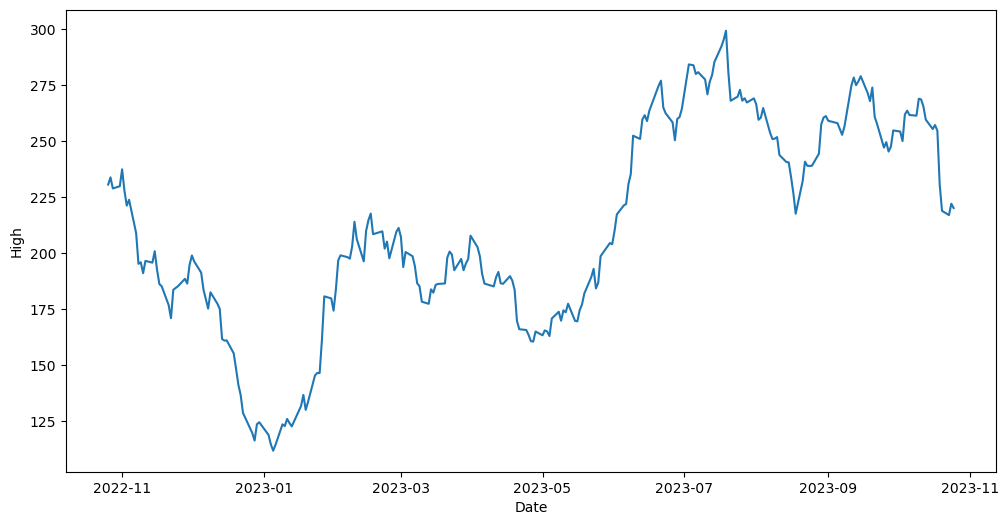

In [9]:
#plot using searborn
plt.figure(figsize = (12, 6))
sns.lineplot(data = tesla['High'])

<Axes: xlabel='Date'>

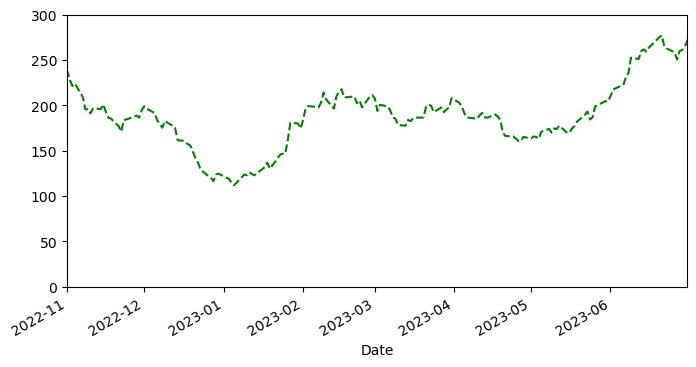

In [13]:
#default plot with coloring
tesla['High'].plot(figsize = (8, 4), xlim= ['2022-11-01', '2023-07-01'], 
                   ylim = [0, 300], ls = '--', c = 'green')

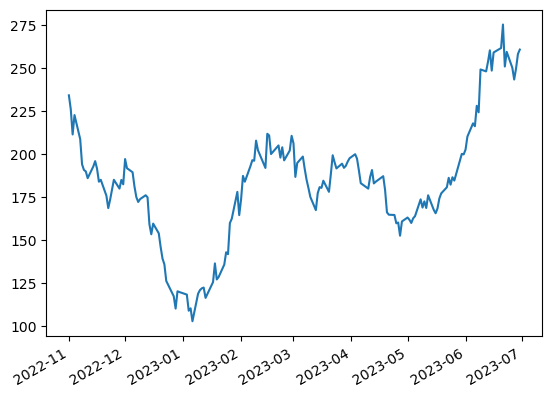

In [14]:
#Datetime index 
index =      tesla.loc['2022-11-01':'2023-07-01'].index
tesla_open = tesla.loc['2022-11-01':'2023-07-01']['Open']

figure, axis = plt.subplots()
figure.autofmt_xdate() # to make x axis crisp without flowing of data
axis.plot(index, tesla_open)

In [15]:
#reset index of datetime
tesla = tesla.reset_index()
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype                           
---  ------        --------------  -----                           
 0   Date          251 non-null    datetime64[ns, America/New_York]
 1   Open          251 non-null    float64                         
 2   High          251 non-null    float64                         
 3   Low           251 non-null    float64                         
 4   Close         251 non-null    float64                         
 5   Volume        251 non-null    int64                           
 6   Dividends     251 non-null    float64                         
 7   Stock Splits  251 non-null    float64                         
dtypes: datetime64[ns, America/New_York](1), float64(6), int64(1)
memory usage: 15.8 KB


In [16]:
#set data as index again
tesla = tesla.set_index('Date')
tesla

datetime(2023, 2, 25)

datetime.datetime(2023, 2, 25, 0, 0)

In [17]:
#function to add 2 numbers
def add_num(num1, num2):
    return num1 + num2

In [18]:
#Time Resampling, minimum of all high in that year, min of all low in that year 
tesla.resample(rule = 'W').min() # W for weekly

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-10-30 00:00:00-04:00,219.399994,228.860001,216.350006,224.639999,61638800,0.0,0.0
2022-11-06 00:00:00-04:00,211.360001,221.199997,203.080002,207.470001,56538800,0.0,0.0
2022-11-13 00:00:00-05:00,186.000000,191.000000,177.119995,177.589996,93916500,0.0,0.0
2022-11-20 00:00:00-05:00,183.960007,185.190002,176.550003,180.190002,64336000,0.0,0.0
2022-11-27 00:00:00-05:00,168.630005,170.919998,166.190002,167.869995,50672700,0.0,0.0
2022-12-04 00:00:00-05:00,179.960007,186.380005,178.750000,180.830002,73645900,0.0,0.0
2022-12-11 00:00:00-05:00,172.199997,175.199997,169.059998,173.440002,84213300,0.0,0.0
2022-12-18 00:00:00-05:00,153.440002,160.929993,150.039993,150.229996,109794500,0.0,0.0
2022-12-25 00:00:00-05:00,126.370003,128.619995,121.019997,123.150002,139390600,0.0,0.0


<Axes: xlabel='Date'>

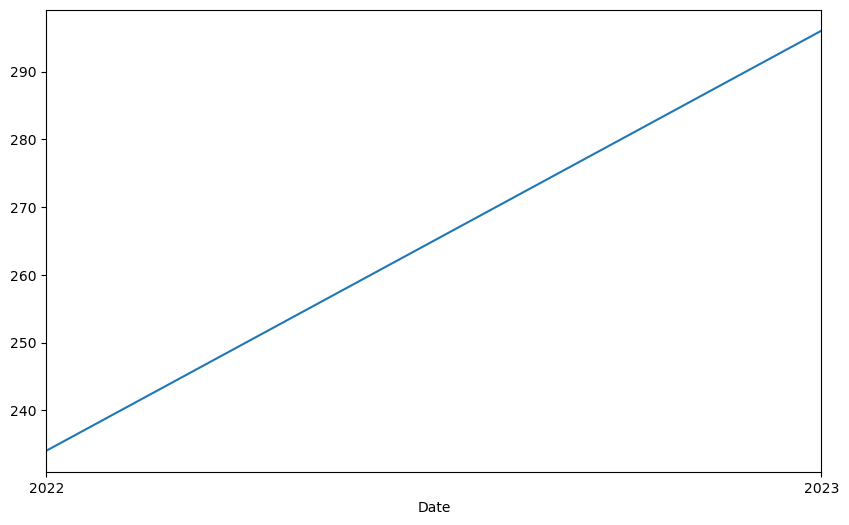

In [19]:
#max values of KPis in that particular year
tesla.resample(rule = 'BA').max()['Open'].plot(figsize = (10, 6))

<Axes: xlabel='Date'>

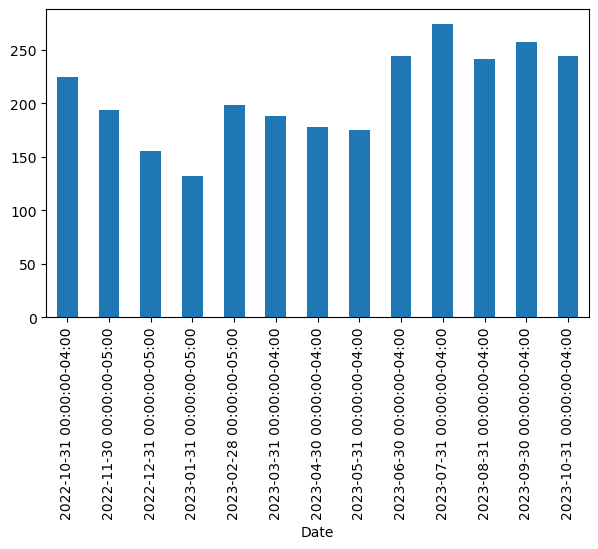

In [20]:
#plotting of business end frequency in a bar plot
tesla['Open'].resample(rule = 'M').mean().plot(figsize = (7, 4), kind = 'bar')

In [22]:
#Try diff types of rule in resample rule

#Rolling
tesla['High'].head(20)

Date
2022-10-26 00:00:00-04:00    230.600006
2022-10-27 00:00:00-04:00    233.809998
2022-10-28 00:00:00-04:00    228.860001
2022-10-31 00:00:00-04:00    229.850006
2022-11-01 00:00:00-04:00    237.399994
2022-11-02 00:00:00-04:00    227.869995
2022-11-03 00:00:00-04:00    221.199997
2022-11-04 00:00:00-04:00    223.800003
2022-11-07 00:00:00-05:00    208.899994
2022-11-08 00:00:00-05:00    195.199997
2022-11-09 00:00:00-05:00    195.889999
2022-11-10 00:00:00-05:00    191.000000
2022-11-11 00:00:00-05:00    196.520004
2022-11-14 00:00:00-05:00    195.729996
2022-11-15 00:00:00-05:00    200.820007
2022-11-16 00:00:00-05:00    192.570007
2022-11-17 00:00:00-05:00    186.160004
2022-11-18 00:00:00-05:00    185.190002
2022-11-21 00:00:00-05:00    176.770004
2022-11-22 00:00:00-05:00    170.919998
Name: High, dtype: float64

In [23]:
tesla['High'].rolling(5).mean().head(20) #rolling average of consecutive 5 days

Date
2022-10-26 00:00:00-04:00           NaN
2022-10-27 00:00:00-04:00           NaN
2022-10-28 00:00:00-04:00           NaN
2022-10-31 00:00:00-04:00           NaN
2022-11-01 00:00:00-04:00    232.104001
2022-11-02 00:00:00-04:00    231.557999
2022-11-03 00:00:00-04:00    229.035999
2022-11-04 00:00:00-04:00    228.023999
2022-11-07 00:00:00-05:00    223.833997
2022-11-08 00:00:00-05:00    215.393997
2022-11-09 00:00:00-05:00    208.997998
2022-11-10 00:00:00-05:00    202.957999
2022-11-11 00:00:00-05:00    197.501999
2022-11-14 00:00:00-05:00    194.867999
2022-11-15 00:00:00-05:00    195.992001
2022-11-16 00:00:00-05:00    195.328003
2022-11-17 00:00:00-05:00    194.360004
2022-11-18 00:00:00-05:00    192.094003
2022-11-21 00:00:00-05:00    188.302005
2022-11-22 00:00:00-05:00    182.322003
Name: High, dtype: float64

In [24]:
#add a rolling mean for last 30 days of open column in tesla dataframe
tesla['Open 30 days rolling'] = tesla['Open'].rolling(30).mean()

In [25]:
tesla[['Open', 'Open 30 days rolling']]

,Open,Open 30 days rolling
Date,,
2022-10-26 00:00:00-04:00,219.399994,NaN
2022-10-27 00:00:00-04:00,229.770004,NaN
2022-10-28 00:00:00-04:00,225.399994,NaN
2022-10-31 00:00:00-04:00,226.190002,NaN
2022-11-01 00:00:00-04:00,234.050003,NaN
...,...,...
2023-10-19 00:00:00-04:00,225.949997,255.968334
2023-10-20 00:00:00-04:00,217.009995,254.828001
2023-10-23 00:00:00-04:00,210.000000,253.019001


<Axes: xlabel='Date'>

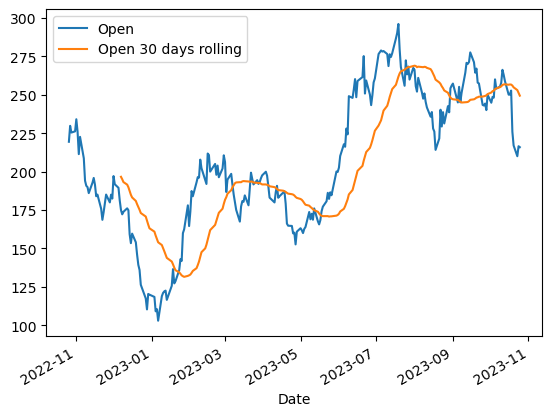

In [26]:
#rolling line is a smoothened version of normal line
tesla[['Open', 'Open 30 days rolling']].plot()

In [ ]:
# Few more samples to try:
    
# 1. Read microsoft data using pandas data reader
msft = pdr.get_data_yahoo('MSFT')

msft.head()
msft.info()

# 2. Get max price of share from 2017 to 2022
msft.loc['2017':'2022']['Close'].max()

# 3. which is the date of the highest price of the stock
msft[msft['Close'] == msft['Close'].max()]

# 4. which is the date of the lowest price of the stock
msft[msft['Close'] == msft['Close'].min()]